In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
from src.features import *
plt.rcParams["figure.figsize"] = (16,9)

In [4]:
from scipy.stats import pearsonr

In [5]:
cols = ['Target', 'Asset_ID', 'Weight', 'timestamp', 'Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']

In [6]:
feature_cols = ['Count', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP']

In [7]:
asset = pd.read_pickle('../data/gresearch/processed/full/Bitcoin.pkl')[cols]

#features, _ = engineer_all_features(btc)

#btc = btc.merge(features,on=['timestamp', 'Asset_ID'])


In [8]:
asset.head()

,Target,Asset_ID,Weight,timestamp,Count,Open,High,Low,Close,Volume,VWAP
0,-0.014643,1,6.779922,2018-01-01 00:01:00,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093
1,-0.015037,1,6.779922,2018-01-01 00:02:00,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591
2,-0.010309,1,6.779922,2018-01-01 00:03:00,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014
3,-0.008999,1,6.779922,2018-01-01 00:04:00,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101
4,-0.008079,1,6.779922,2018-01-01 00:05:00,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842


In [9]:
for period in np.arange(1,21,1):
    lagged_features = create_lagged_features(asset,
                                             feature_cols=['Target'],
                                             period=period)

    asset = asset.merge(lagged_features,
                              on=['timestamp', 'Asset_ID'],
                              how='left')

In [10]:
lag_cols = asset.columns[11:]
lag_cols

Index(['lag_1_min_Target', 'lag_2_min_Target', 'lag_3_min_Target',
       'lag_4_min_Target', 'lag_5_min_Target', 'lag_6_min_Target',
       'lag_7_min_Target', 'lag_8_min_Target', 'lag_9_min_Target',
       'lag_10_min_Target', 'lag_11_min_Target', 'lag_12_min_Target',
       'lag_13_min_Target', 'lag_14_min_Target', 'lag_15_min_Target',
       'lag_16_min_Target', 'lag_17_min_Target', 'lag_18_min_Target',
       'lag_19_min_Target', 'lag_20_min_Target'],
      dtype='object')

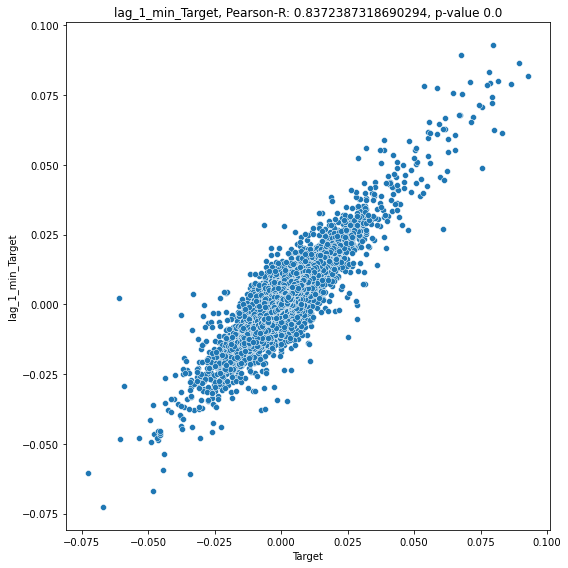

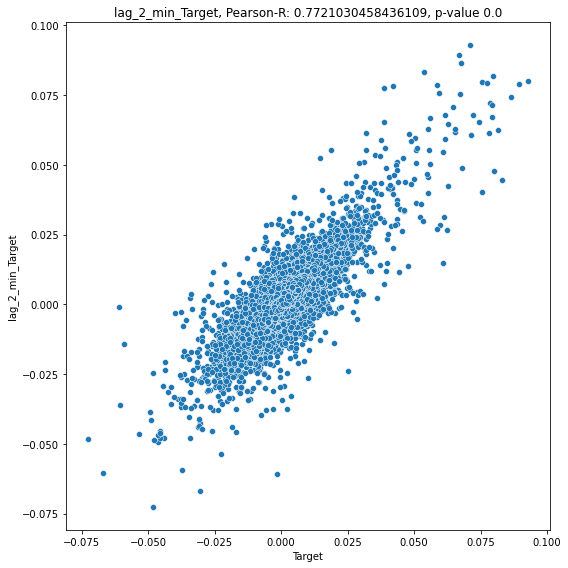

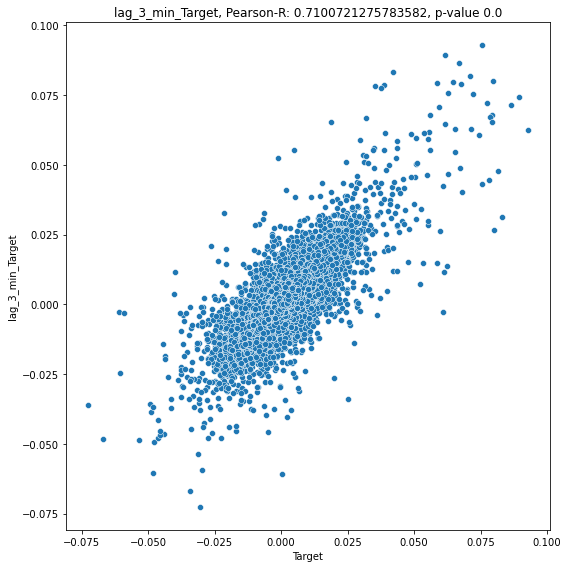

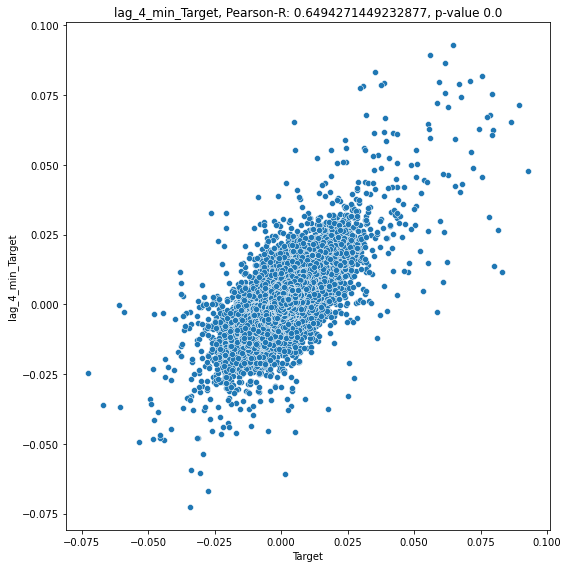

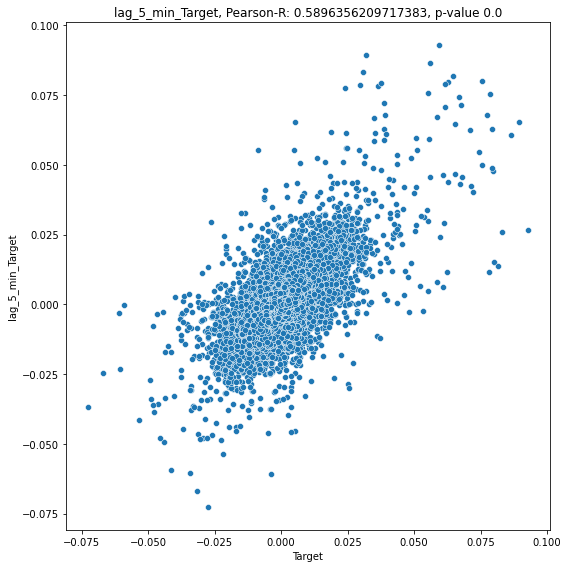

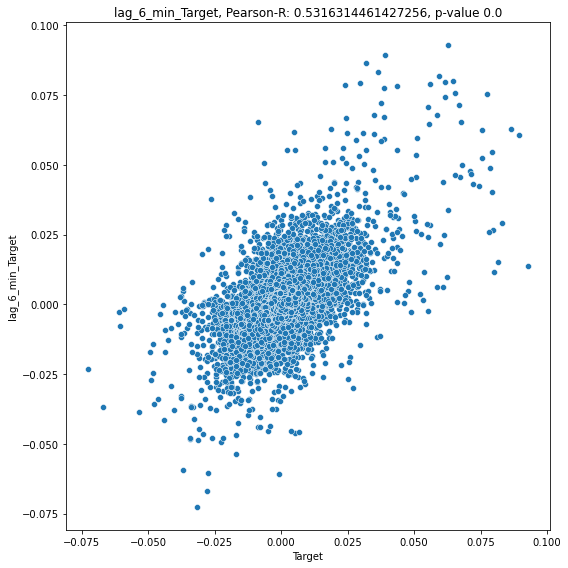

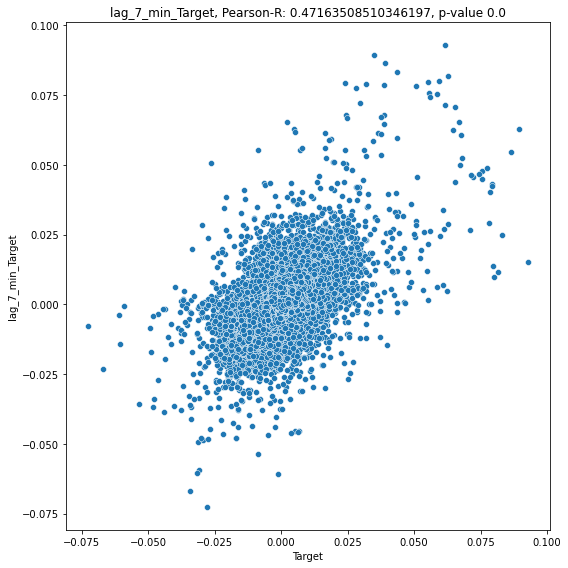

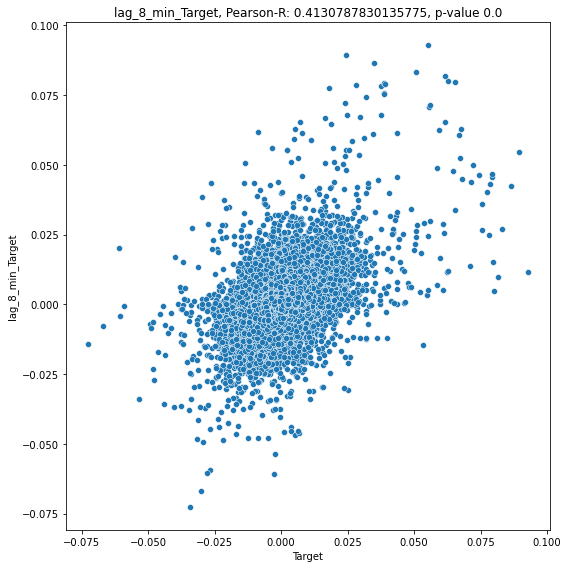

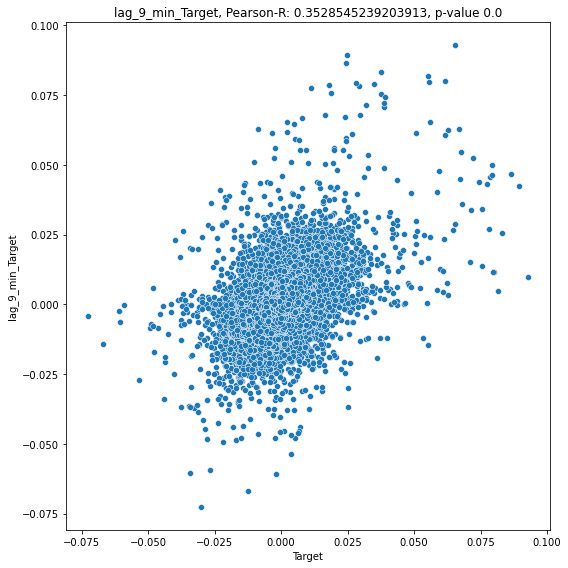

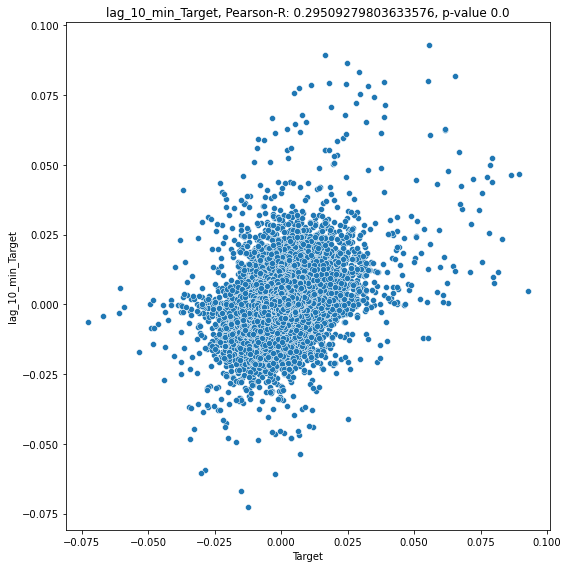

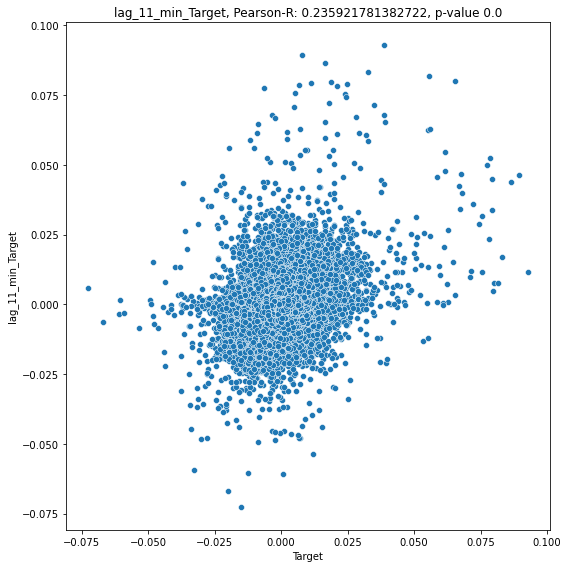

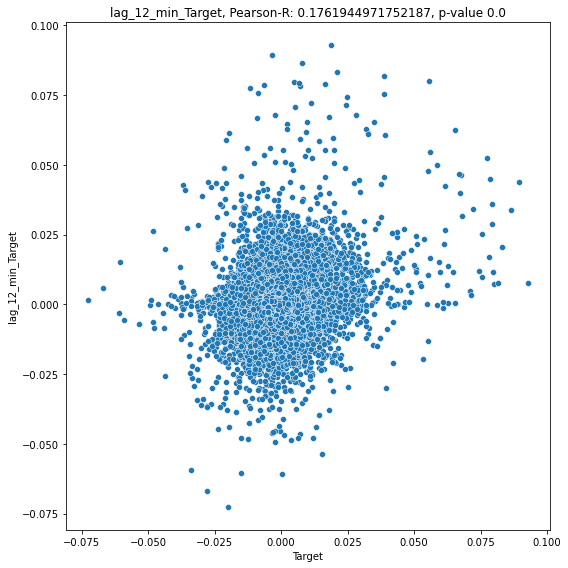

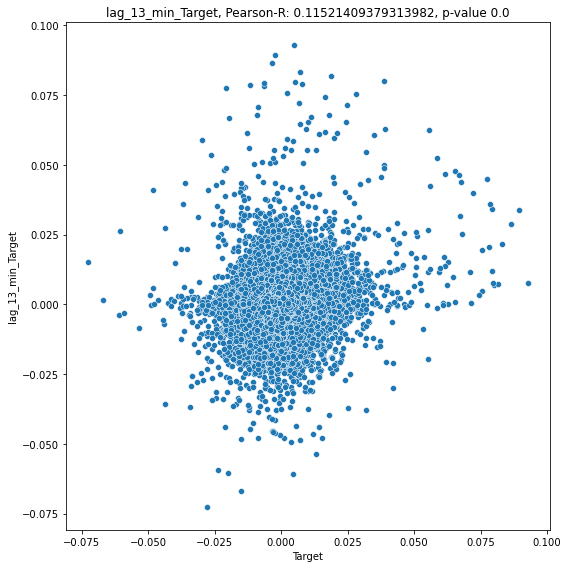

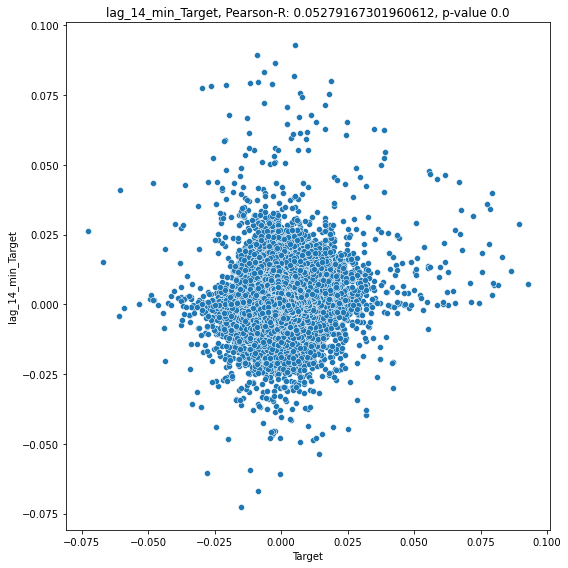

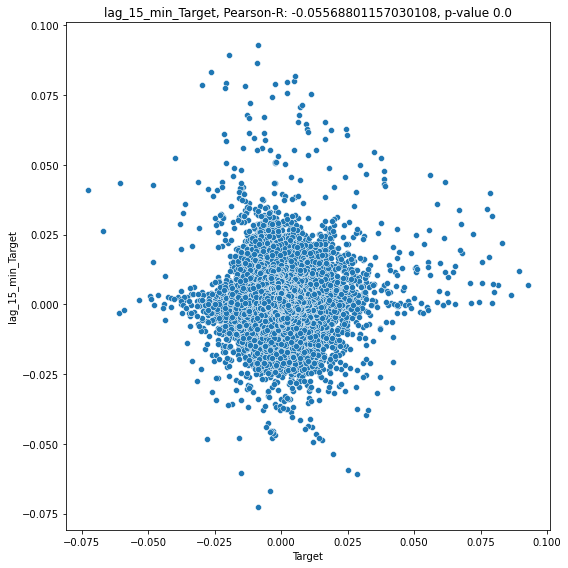

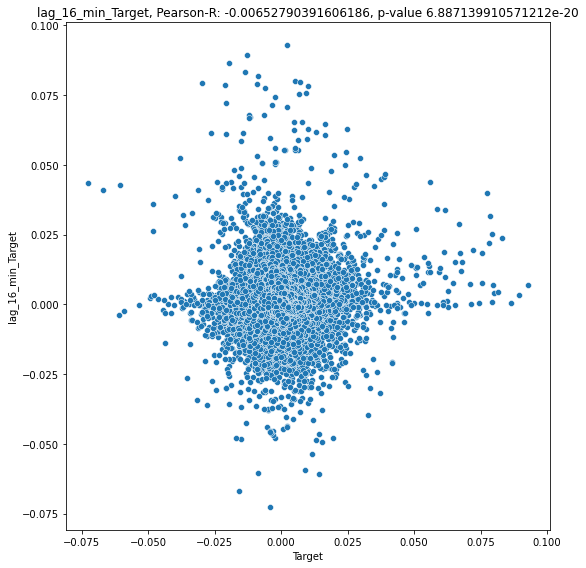

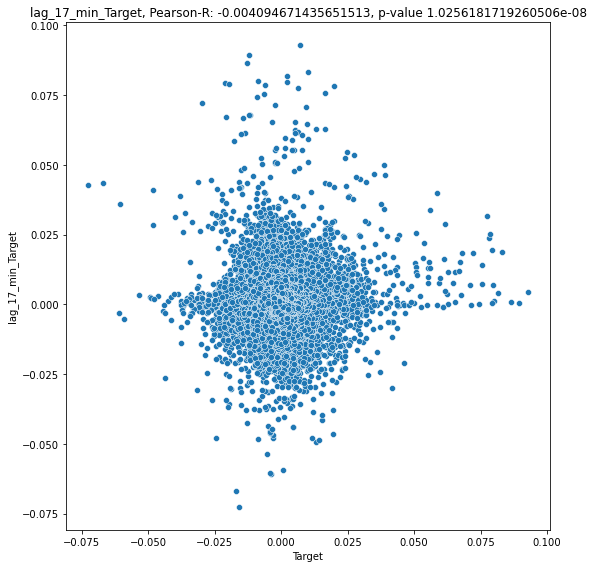

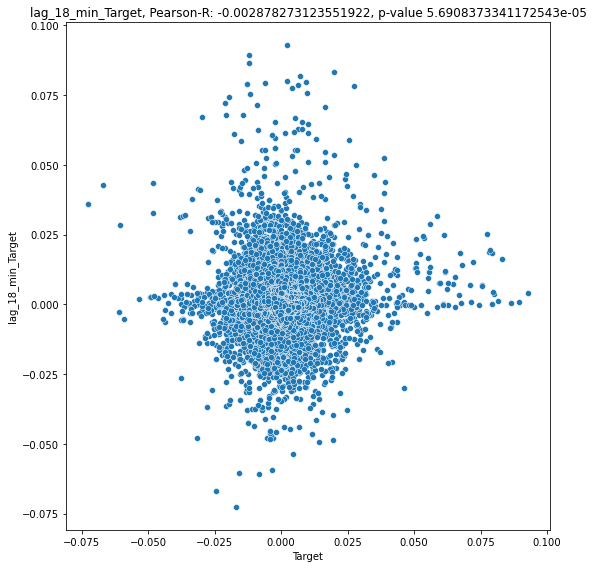

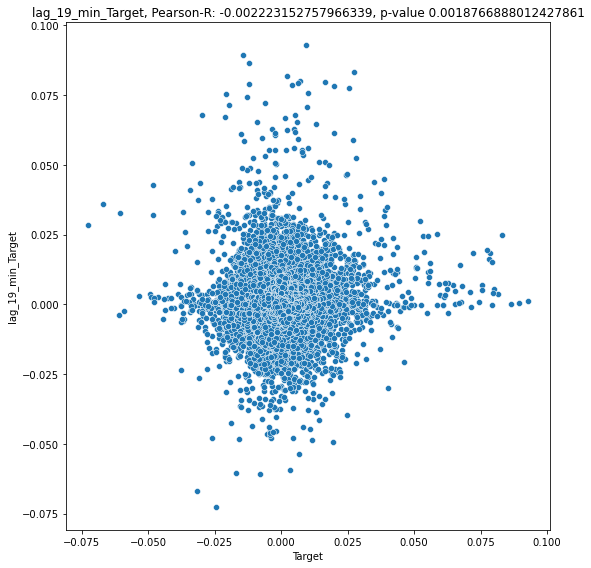

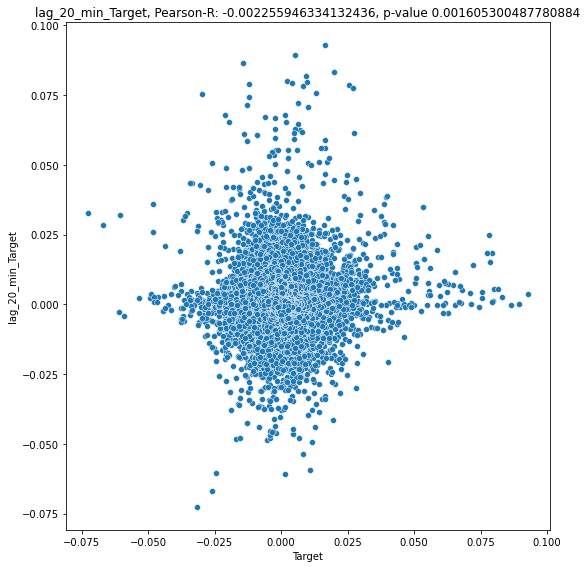

In [11]:
for col in lag_cols:
    temp = asset[['Target', col]].dropna()
    roh, pval = pearsonr(temp['Target'], temp[col])
    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(x=temp.Target, y=temp[col])
    ax.set_title(f'{col}, Pearson-R: {roh}, p-value {pval}')
    plt.tight_layout()
    